In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.ensemble import IsolationForest
import math 

In [2]:
df = pd.read_csv("/content/creditcard_data.csv")


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.isnull().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000,37865.000000
mean,24821.072653,-0.208641,0.059182,0.716995,0.192823,-0.225019,0.099825,-0.113943,0.037099,0.233531,-0.079102,0.437275,-0.498009,0.270164,0.251290,0.090810,-0.002390,0.156977,-0.088980,-0.034238,0.046938,-0.029874,-0.112265,-0.041414,0.006699,0.136058,0.021711,0.009202,0.003924,86.291276,0.002720
std,12534.820692,1.827010,1.544554,1.517603,1.404488,1.379907,1.306854,1.249521,1.228214,1.230247,1.126851,1.132046,1.398480,1.151458,1.148110,0.957346,0.930396,1.052849,0.857479,0.817344,0.682869,0.759947,0.639275,0.550128,0.593672,0.435903,0.505594,0.386088,0.298948,234.052494,0.052085
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,-14.166795,-3.105965,-17.769143,-3.808724,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,14014.000000,-0.962880,-0.514891,0.238718,-0.715402,-0.829027,-0.639261,-0.596478,-0.154067,-0.544353,-0.558809,-0.380669,-1.423647,-0.509304,-0.256273,-0.467446,-0.491273,-0.338851,-0.564247,-0.526422,-0.162473,-0.238250,-0.535174,-0.178699,-0.327515,-0.127896,-0.331151,-0.063230,-0.007025,7.180000,0.000000
50%,29877.000000,-0.232692,0.107230,0.821591,0.188855,-0.263289,-0.159160,-0.073959,0.045986,0.107891,-0.135595,0.409482,-0.138978,0.192914,0.209463,0.211201,0.062128,0.097296,-0.071706,-0.033514,-0.022343,-0.078985,-0.086008,-0.052263,0.061240,0.175810,-0.064362,0.008624,0.021292,22.850000,0.000000
75%,34990.000000,1.161477,0.749021,1.451770,1.074885,0.299528,0.488392,0.434188,0.311376,0.958227,0.367182,1.222399,0.478806,1.020948,0.856721,0.769751,0.558559,0.589928,0.406003,0.475943,0.168103,0.098244,0.298357,0.076471,0.398955,0.421241,0.301099,0.085683,0.075785,77.900000,0.000000
max,39143.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,12.701538,12.018913,4.846452,4.465413,7.692209,3.832930,6.098529,9.253526,4.295648,4.555359,17.281859,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


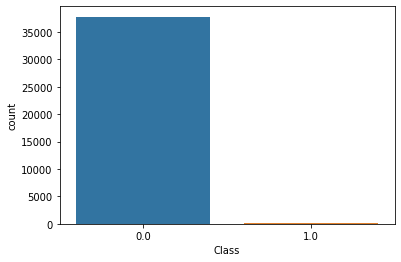

In [8]:
sns.countplot(x='Class',data = df)

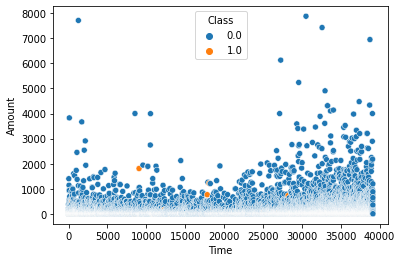

In [9]:
sns.scatterplot(data=df, x="Time", y="Amount",hue='Class')

In [10]:
normal = df[df['Class']==0]
fake = df[df['Class']==1]


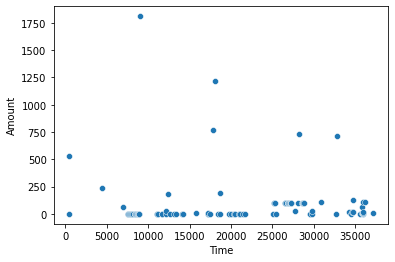

In [11]:
sns.scatterplot(data=fake,  x="Time", y="Amount")

In [12]:
#sns.boxplot(x ='Time',y='Amount',hue = 'Class',data=df)

In [13]:
random_state = np.random.RandomState(42)

In [14]:
X = df.drop(['Class'],axis = 1)
Y = df['Class']
y_cont = Y.copy()

In [37]:
def findContamination(data):
  normal = 0
  fake = 0
  for i in range(len(data)):
    if (data[i] == 0.0):
      normal +=1
    else:
      fake +=1
  total = normal + fake 
  contamination = fake/total
  print(contamination)
  return "{:.4f}".format(contamination)
#Y.shape
class_list = df['Class'].to_list()
contamination = findContamination(class_list)
print(contamination)

0.002720190149214314
0.0027


In [38]:
model = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(contamination),random_state=random_state)
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.0027,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7F80A36468D0, verbose=0,
                warm_start=False)

In [39]:
print(model.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.0027, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F80A36468D0, 'verbose': 0, 'warm_start': False}


In [40]:
scores = model.decision_function(X)
y_pred = model.predict(X)

In [20]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()

In [21]:
from sklearn.metrics import classification_report,accuracy_score
print("{}: {}".format("ISolation Forest",n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

ISolation Forest: 120
Accuracy Score :
0.9968308464280998
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37762
         1.0       0.42      0.42      0.42       103

    accuracy                           1.00     37865
   macro avg       0.71      0.71      0.71     37865
weighted avg       1.00      1.00      1.00     37865



In [22]:
X.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [23]:
sample = df.sample(n = 1, replace = False)
X_sample = sample.drop(['Class'],axis = 1)
Y = sample['Class']
sample_copy = sample.copy()

In [24]:
sample_copy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8562,11541,1.230047,-0.053162,0.802169,0.47537,-0.853834,-0.894136,-0.268009,-0.241629,2.02449,-0.738822,0.558139,-1.854494,1.649682,1.200808,-1.07631,-0.495624,1.034535,-0.563584,0.130948,-0.122113,-0.239383,-0.203334,-0.013274,0.768097,0.378837,1.051514,-0.093588,-0.001806,12.05,0.0


In [25]:
sample_copy['scores'] = model.decision_function(X_sample)
sample_copy['y_pred'] = model.predict(X_sample)
sample_copy[sample_copy == 1] = 0
sample_copy[sample_copy == -1] = 1

In [26]:
sample_copy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scores,y_pred
8562,11541,1.230047,-0.053162,0.802169,0.47537,-0.853834,-0.894136,-0.268009,-0.241629,2.02449,-0.738822,0.558139,-1.854494,1.649682,1.200808,-1.07631,-0.495624,1.034535,-0.563584,0.130948,-0.122113,-0.239383,-0.203334,-0.013274,0.768097,0.378837,1.051514,-0.093588,-0.001806,12.05,0.0,0.269079,0
